# Action2
Titanic生存率预测


In [1]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , roc_auc_score 

In [32]:
#加载数据集
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]
print(train_df.columns.values)
train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#查看离散数据类型的分布情况
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rosblom, Mr. Viktor Richard",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
#特征相关性检验
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


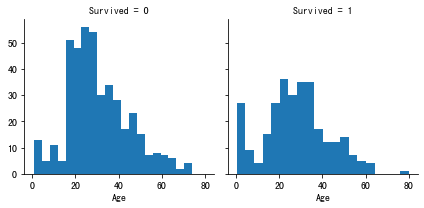

In [8]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

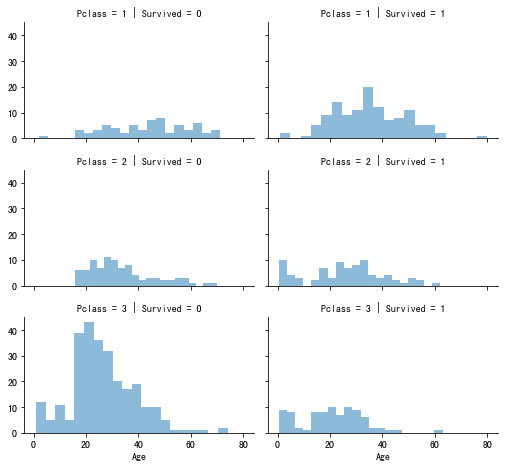

In [9]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


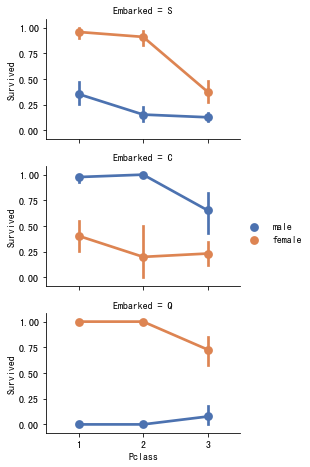

In [10]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

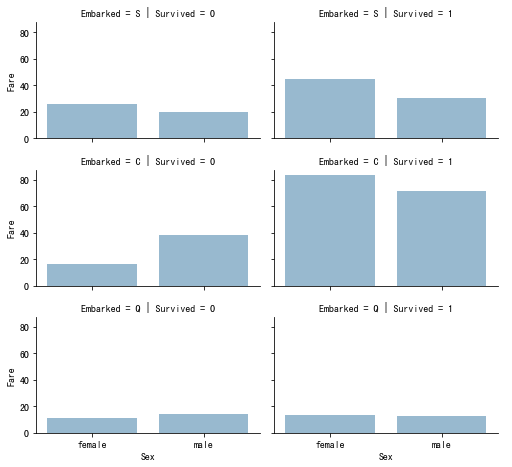

In [11]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=['female','male'])
grid.add_legend()

In [12]:
# 缺失值处理
# 使用平均年龄来填充年龄中的nan值
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
# 使用票价的均值填充票价中的nan值
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

print(train_df['Embarked'].value_counts())
# 使用登录最多的港口来填充登录港口的nan值
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S',inplace=True)


S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [20]:
# 特征选择
from sklearn.feature_extraction import DictVectorizer

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_df[features]
train_labels = train_df['Survived']

test_features = test_df[features]
test_labels = train_df['Survived']


dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
test_features=dvec.fit_transform(test_features.to_dict(orient='record'))
# print(train_features)
print(test_features)


[[34.5         0.          1.         ...  0.          1.
   0.        ]
 [47.          0.          0.         ...  1.          0.
   1.        ]
 [62.          0.          1.         ...  0.          1.
   0.        ]
 ...
 [38.5         0.          0.         ...  0.          1.
   0.        ]
 [30.27259036  0.          0.         ...  0.          1.
   0.        ]
 [30.27259036  1.          0.         ...  0.          1.
   1.        ]]


In [21]:
def show_feature_importance(feature_list, feature_importance):
	# 设定阈值
	fi_threshold = 20
	# 重要特征的下标
	important_idx = np.where(feature_importance > fi_threshold)[0]
	# 特征名称
	important_features = [feature_list[i] for i in important_idx]
	# 重要特征
	sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
	# 可视化
	pos = np.arange(sorted_idx.shape[0]) + 0.5
	plt.subplot(1, 2, 2)
	plt.title('Feature Importance')
	plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
	plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
	plt.xlabel('Relative Importance')
	plt.draw()
	plt.show()


In [ ]:
# 使用LR分类器
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=100, verbose=True, random_state=33, tol=1e-4)
clf.fit(train_features, train_labels)
# 获取特征重要性（更容易幸存的特征）
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())

pred_lables = clf.predict(test_features)
print(round(clf.score(train_features,train_labels),4))


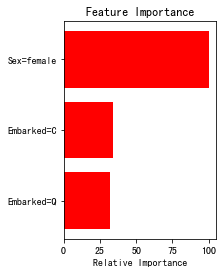

In [17]:
show_feature_importance(dvec.feature_names_, feature_importance)

In [48]:
from sklearn.tree import DecisionTreeClassifier

# 构造ID3决策树
clf = DecisionTreeClassifier(criterion='entropy')
# 决策树训练
clf.fit(train_features, train_labels)

# 决策树预测
pred_labels = clf.predict(test_features)

# 得到决策树准确率(基于训练集)
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score准确率为 %.4lf' % acc_decision_tree)

# 使用K折交叉验证 统计决策树准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))

score准确率为 0.9820
cross_val_score准确率为 0.7745


In [34]:
# 使用TPOT自动机器学习工具对MNIST进行分类
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import numpy as np

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(train_features, train_labels)
print(tpot.score(train_features, train_labels))
tpot.export('tpot_titanic_pipeline.py')


Generation 1 - Current best internal CV score: 0.8305693302366455
Generation 2 - Current best internal CV score: 0.8305693302366455
Generation 3 - Current best internal CV score: 0.8361621994852803
Generation 4 - Current best internal CV score: 0.8361621994852803
Generation 5 - Current best internal CV score: 0.8384093904965162
Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.5, min_samples_leaf=6, min_samples_split=16, n_estimators=100)
0.8866442199775533


In [41]:
pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple/

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     |████████████████████████████████| 148.9 MB 28 kB/s /s eta 0:00:01               | 2.1 MB 12.6 MB/s eta 0:00:120:12                          | 11.0 MB 12.6 MB/s eta 0:00:11███▏                           | 19.2 MB 77 kB/s eta 0:27:57                 | 28.1 MB 77 kB/s eta 0:26:01           | 30.8 MB 77 kB/s eta 0:25:27         | 34.8 MB 77 kB/s eta 0:24:34��▍                       | 39.0 MB 77 kB/s eta 0:23:40    |██████████▉                     | 50.3 MB 12.3 MB/s eta 0:00:09        | 58.1 MB 44.5 MB/s eta 0:00:03�████████▍                  | 62.2 MB 44.5 MB/s eta 0:00:02███▌                 | 67.5 MB 44.5 MB/s eta 0:00:02   | 90.5 MB 64.7 MB/s eta 0:00:01:49[K     |███████████████████████████▌    | 128.0 MB 148 kB/s eta 0:02:21��███████████████████▋   | 133.2 MB 148 kB/s eta 0:01:46    |█████████████████████████████▉  | 139.0 MB 5.5 MB/s eta 0